In [1]:
import pandas as pd 
gangnam_df = pd.read_csv("./dataset/gangnam_station.csv", index_col=0)
pangyo_df = pd.read_csv("./dataset/pangyo_station.csv", index_col=0)
seol_df = pd.read_csv("./dataset/seolleung_station.csv", index_col=0)

In [76]:
seol_df = seol_df.drop_duplicates()

In [75]:
pangyo_df = pangyo_df.drop_duplicates()

## 1. Gangnam Station

In [57]:
gangnam_df = gangnam_df.drop_duplicates()
gangnam_df

,address_name,category_group_code,category_group_name,category_name,distance,id,phone,place_name,place_url,road_address_name,x,y
0,서울 강남구 역삼동 858,FD6,음식점,음식점 > 분식,16,1522509062,02-3452-9993,로봇김밥 강남역점,http://place.map.kakao.com/1522509062,서울 강남구 테헤란로 101,127.028036,37.497058
1,서울 강남구 역삼동 858,FD6,음식점,음식점 > 간식,14,1043000468,02-566-9527,쿠키야,http://place.map.kakao.com/1043000468,서울 강남구 강남대로 지하 396,127.027923,37.497300
91,서울 서초구 서초동 1319-10,FD6,음식점,음식점 > 분식,27,897642142,NaN,홍할머니,http://place.map.kakao.com/897642142,서울 서초구 강남대로 383,127.027706,37.496998
92,서울 강남구 역삼동 858,FD6,음식점,"음식점 > 간식 > 제과,베이커리",25,2085443473,02-538-7080,자연식빵 강남직영점,http://place.map.kakao.com/2085443473,서울 강남구 강남대로 지하 396,127.028181,37.497058
272,서울 강남구 역삼동 858,FD6,음식점,"음식점 > 간식 > 제과,베이커리",39,82706348,NaN,브릭샌드 강남역점,http://place.map.kakao.com/82706348,NaN,127.028155,37.496872
...,...,...,...,...,...,...,...,...,...,...,...,...
26925,서울 강남구 역삼동 828-22,FD6,음식점,음식점 > 분식,474,1863534623,02-6014-1245,보슬보슬 역삼본점,http://place.map.kakao.com/1863534623,서울 강남구 논현로85길 59,127.033270,37.497607
30315,서울 강남구 역삼동 619-5,FD6,음식점,"음식점 > 한식 > 육류,고기 > 곱창,막창",522,168079537,02-556-2640,60년전통신촌황소곱창 강남직영점,http://place.map.kakao.com/168079537,서울 강남구 강남대로100길 13,127.027169,37.501841
32348,서울 강남구 역삼동 833,FD6,음식점,음식점 > 중식 > 중국요리,557,10252806,02-555-0550,대려도,http://place.map.kakao.com/10252806,서울 강남구 역삼로 118,127.032268,37.493529
39095,서울 서초구 서초동 1303-37,FD6,음식점,음식점 > 샤브샤브,659,1372079546,02-533-8260,하이디라오 강남점,http://place.map.kakao.com/1372079546,서울 서초구 서초대로77길 54,127.024801,37.502564


In [58]:
category_list = gangnam_df['category_name'].to_list() 
parsed = []
for item in category_list:
    splitted = item.split(">")
    parsed.append(splitted)

### N 차 분류 (음식점 > 한식 > ...) 가 가장 많은지 확인 
- 3차 분류가 가장 많았음

In [59]:
 from collections import defaultdict
# 몇차 분류가 가장 많은지 count 하기 
results = defaultdict(int)
for item in parsed:
    n = len(item)
    results[f'{n}차 분류'] += 1

In [60]:
results

defaultdict(int, {'2차 분류': 43, '3차 분류': 105, '4차 분류': 33, '5차 분류': 2})

In [61]:
import pandas as pd 
temp_df = pd.DataFrame({'steps': ['2 steps', '3 steps', '4 steps', '5 steps'],
                       'count':[43, 105, 33, 2]})

<Axes: xlabel='steps'>

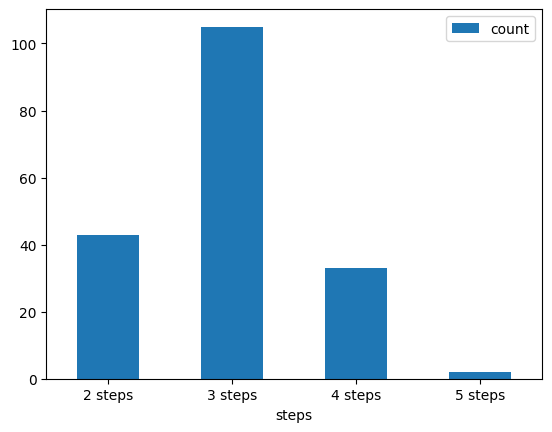

In [62]:
temp_df.plot.bar(x='steps', y='count', rot=0)

In [63]:
parsed2 = []
for item in category_list:
    splitted = item.split(">")[1:]
    for token in splitted:
        parsed2.append(token.strip())

In [71]:
from collections import Counter

result = Counter(parsed2)

In [72]:
result.most_common(15)

[('한식', 56),
 ('육류,고기', 27),
 ('간식', 20),
 ('일식', 20),
 ('양식', 18),
 ('술집', 18),
 ('중식', 14),
 ('제과,베이커리', 13),
 ('분식', 11),
 ('호프,요리주점', 9),
 ('중국요리', 9),
 ('초밥,롤', 7),
 ('일본식주점', 6),
 ('아시아음식', 5),
 ('패스트푸드', 5)]

### Visualization (Gangnam)

In [69]:
!pip install WordCloud

  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
   ------------------------------------- -- 143.4/152.1 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00


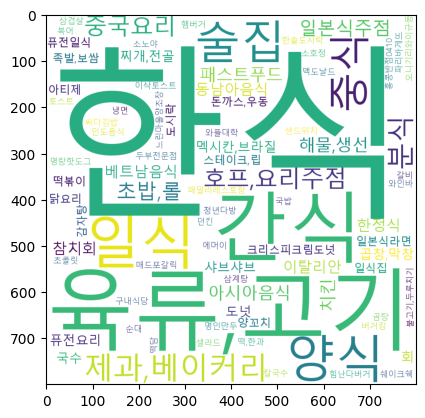

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
# font_path = 'C:/Windows/Fonts/HMKMRHD.TTF'

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250, background_color="white")
gen = wc.generate_from_frequencies(result)
plt.figure()
plt.imshow(gen)

# 모든 지역 통합 분석

In [111]:
gangnam_category = gangnam_df['category_name'].to_list() 
seoul_category = seol_df['category_name'].to_list()
pangyo_category = pangyo_df['category_name'].to_list()

category_list = gangnam_category + seoul_category + pangyo_category

token_list = []
level_cnt = defaultdict(int)
level_list = defaultdict(list)

for item in category_list:
    splitted = item.split(">")[1:]
    n = len(splitted)
    level_cnt[f'{n+1}차 분류'] += 1
    for i in range(n):
        token = splitted[i].strip()
        level_list[i+2].append(token)
        token_list.append(token)

In [97]:
level_cnt

defaultdict(int, {'2차 분류': 116, '3차 분류': 272, '4차 분류': 81, '5차 분류': 7})

In [114]:
print(len(level_list[2]), len(level_list[3]), len(level_list[4]), len(level_list[5]))

476 360 88 7


In [115]:
# depth 2
depth2 = Counter(level_list[2])
depth2

Counter({'한식': 190,
         '일식': 49,
         '술집': 41,
         '양식': 40,
         '간식': 33,
         '중식': 32,
         '분식': 21,
         '아시아음식': 14,
         '패스트푸드': 12,
         '치킨': 10,
         '샐러드': 8,
         '샤브샤브': 6,
         '뷔페': 6,
         '퓨전요리': 5,
         '패밀리레스토랑': 4,
         '도시락': 3,
         '구내식당': 2})

In [116]:
# depth 3
depth3 = Counter(level_list[3])
depth3

Counter({'육류,고기': 80,
         '해물,생선': 24,
         '제과,베이커리': 23,
         '중국요리': 22,
         '호프,요리주점': 17,
         '일본식주점': 15,
         '동남아음식': 12,
         '한정식': 11,
         '돈까스,우동': 10,
         '초밥,롤': 10,
         '찌개,전골': 10,
         '참치회': 8,
         '이탈리안': 7,
         '일식집': 7,
         '국수': 6,
         '햄버거': 6,
         '국밥': 6,
         '멕시칸,브라질': 5,
         '양꼬치': 5,
         '감자탕': 5,
         '샌드위치': 4,
         '떡볶이': 4,
         '냉면': 4,
         '도넛': 3,
         '스테이크,립': 3,
         '곰탕': 3,
         '맥도날드': 3,
         '칵테일바': 3,
         '아이스크림': 3,
         '매드포갈릭': 2,
         '퓨전일식': 2,
         '두부전문점': 2,
         '버거킹': 2,
         '일본식라면': 2,
         '인도음식': 2,
         '순대': 2,
         '퓨전한식': 2,
         '설렁탕': 2,
         '해산물뷔페': 2,
         '한솥도시락': 1,
         '명랑핫도그': 1,
         '떡,한과': 1,
         '명인만두': 1,
         '와인바': 1,
         '초콜릿': 1,
         '싸다김밥': 1,
         '토스트': 1,
         '쉐이크쉑': 1,
         '주먹밥': 1,
         

In [117]:
# depth 4
depth4 = Counter(level_list[4])
depth4

Counter({'베트남음식': 9,
         '회': 8,
         '닭요리': 8,
         '곱창,막창': 7,
         '족발,보쌈': 6,
         '파리바게뜨': 4,
         '갈비': 4,
         '삼겹살': 4,
         '아티제': 3,
         '복어': 3,
         '크리스피크림도넛': 2,
         '칼국수': 2,
         '써브웨이': 2,
         '추어': 2,
         '본죽&비빔밥cafe': 2,
         '소노야': 1,
         '오니기리와이규동': 1,
         '와플대학': 1,
         '떡담': 1,
         '던킨': 1,
         '불고기,두루치기': 1,
         '소호정': 1,
         '힘난다버거': 1,
         '이삭토스트': 1,
         '청년다방': 1,
         '홍콩반점0410': 1,
         '느린마을양조장': 1,
         '브레댄코': 1,
         '퀴즈노스': 1,
         '포메인': 1,
         '장어': 1,
         '배스킨라빈스': 1,
         '아구': 1,
         '뚜레쥬르': 1,
         '하겐다즈': 1,
         '경복궁': 1,
         '게,대게': 1})

In [91]:
count_token = Counter(token_list)
count_token

Counter({'한식': 190,
         '육류,고기': 80,
         '일식': 49,
         '술집': 41,
         '양식': 40,
         '간식': 33,
         '중식': 32,
         '해물,생선': 24,
         '제과,베이커리': 23,
         '중국요리': 22,
         '분식': 21,
         '호프,요리주점': 17,
         '일본식주점': 15,
         '아시아음식': 14,
         '동남아음식': 12,
         '패스트푸드': 12,
         '한정식': 11,
         '돈까스,우동': 10,
         '초밥,롤': 10,
         '찌개,전골': 10,
         '치킨': 10,
         '베트남음식': 9,
         '회': 8,
         '닭요리': 8,
         '참치회': 8,
         '샐러드': 8,
         '이탈리안': 7,
         '일식집': 7,
         '곱창,막창': 7,
         '국수': 6,
         '햄버거': 6,
         '족발,보쌈': 6,
         '국밥': 6,
         '샤브샤브': 6,
         '뷔페': 6,
         '멕시칸,브라질': 5,
         '퓨전요리': 5,
         '양꼬치': 5,
         '감자탕': 5,
         '파리바게뜨': 4,
         '패밀리레스토랑': 4,
         '갈비': 4,
         '샌드위치': 4,
         '떡볶이': 4,
         '냉면': 4,
         '삼겹살': 4,
         '도시락': 3,
         '도넛': 3,
         '아티제': 3,
         '스테이크,립

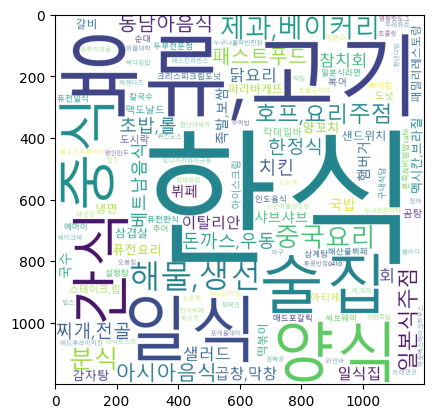

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
# font_path = 'C:/Windows/Fonts/HMKMRHD.TTF'

wc = WordCloud(font_path='malgun', width=600, height=600, scale=2.0, max_font_size=230, background_color="white")
gen = wc.generate_from_frequencies(count_token)
plt.figure()
plt.imshow(gen)